## INTRODUCTION
The real estate agency operating in Northwestern county wants to an analysis on the types of houses in the county to asses their value. However they lack knowledge on what types of houses to choose and the price the range in order to make firm decisions that will generate profits.
# Business understanding
  The real estate agency lacks enough knowledge on how to perform best in this field. The business problem is to develop a predictive model that can accurately estimate house prices based on various features provided in the King County House Sales dataset. The agency aims to use this model to guide their clients in setting competitive prices for their properties, optimize their marketing strategies, and improve their overall business performance in the real estate market.

# Project goal
To develop a predictive model that can accurately estimate house prices that is profit yielding in various features such as location, size, condition, and amenities.

# Data understanding
To achieve this, we will build multiple models starting with a basic model and then iteratively refining it to improve predictive accuracy and interpretability. By analyzing the dataset, performing data visualization, and evaluating different model performance, we can gain insights into the key factors influencing house prices in the area and provide actionable recommendations to the real estate agency.

# Methods
The size of the dataset is wide allowing for a robust analysis and provides a comprehensive view of the houses' information. I will perform a statistical data analysis using varous data science modeling analytical tool and come up with visualizations that can describe the data better to the stakeholders. This will help identify key trends and characteristics of the houses such as location, size, condition, and amenities.

However, it is important to acknowledge that the datasets may have some limitations. They might not capture the entire universe of houses, and there could be missing or incomplete data for certain houses. Additionally, the data might be subject to biases or limitations inherent in the sources themselves. Despite these limitations, the datasets provide valuable insights into the movie industry and are suitable for addressing the business problem at hand.
# Conclusion
The aim of this project is to provide valuable insights for the real estate agency through exploring the dataset. Through this comprehensive house dataset analysis, I can identify the types of houses to focus on. The findings of this analysis will enable stakeholders to make informed decisions concerning the types of houses to invest on. Through these insights, the real estate agency can become successful in the real estate industry and establish a strong presence as a best genuine business people.

## DATA PREPARATION AND DATA ANALYSIS
# Data preparation
Here, I used the dataset from kc_house_data. This data provides a wide range of data collected overtime that can be a good starting point.

# Rationale of the analysis: 
We are using statistical analyses, specifically multiple linear regression modeling, to capture the relationships between the independent variables and the dependent variable in a quantitative manner. Regression coefficients provide us with the magnitudes and directions of these relationships, enabling us to estimate the impact of each feature on house prices. Using regression coefficients goes beyond the visual exploration of data and provides precise numerical measures of the feature contributions.

The problem of analyzing house sales in a northwestern county is suitable for multiple linear regression because it involves multiple independent variables that may collectively influence the house prices. This form of analysis allows us to estimate the relative importance of each feature and understand how changes in these features affect the predicted house prices.

# Limitations of the analysis: 
The assumptions of linear regression: such as linearity, independence, homoscedasticity, and normally distributed errors. Violations of these assumptions can affect the validity of the model. The presence of multicollinearity (high correlation among independent variables) can lead to unstable coefficient estimates. Missing data and outliers should also be considered.

Missing Data: Missing data handling is crucial but not explicitly addressed in this analysis. Dropping missing values might lead to a loss of information, and imputation techniques could be explored.
# Data analysis process
Here, I will use linear regression modeling in analysing the dataset. I will perform data exploration na d cleaning on the data, bulid a baseline model, iterate through it and report on its metrics. Then use visualizations and finally come up with recommendations on the findings of the analysis.

In [170]:
# Start by importing necessary modules and load the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


df = pd.read_csv("kc_house_data.csv")

# Exploring the data

In [171]:
# View the dataset
df.shape
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [172]:
# View information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Data cleaning process

In [173]:
# Print out a few rows of the dataset
print("Kc House Data:")
print(df.head())
print(df.describe)

Kc House Data:
           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178 

In [174]:
# Check for dulicated data
duplicated_rows = df.duplicated()
print("Number of duplicated rows:", duplicated_rows.sum())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Number of duplicated rows: 0
Missing values:
 id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [175]:
# Handling Missing Values by droping them
missing_values = df.dropna(inplace=True) 

In [176]:
# Recheck for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Handling Non-Numeric Data

In [177]:
# Identify non-numeric features
non_numeric_features = df.select_dtypes(include=['object']).columns.tolist()
non_numeric_features

['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']

# Apply one-hot encoding on the non-numeric data

In [178]:
y = df["price"]
X = df[["waterfront", "view", "condition", "grade", "sqft_basement"]]
X

,waterfront,view,condition,grade,sqft_basement
1,NO,NONE,Average,7 Average,400.0
3,NO,NONE,Very Good,7 Average,910.0
4,NO,NONE,Average,8 Good,0.0
5,NO,NONE,Average,11 Excellent,1530.0
6,NO,NONE,Average,7 Average,?
...,...,...,...,...,...
21591,NO,NONE,Average,8 Good,130.0
21592,NO,NONE,Average,8 Good,0.0
21593,NO,NONE,Average,8 Good,0.0
21594,NO,NONE,Average,7 Average,0.0


In [179]:
X = pd.get_dummies(X, columns=["waterfront", "view", "condition", "grade", "sqft_basement"], drop_first=True)
X

,waterfront_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,...,sqft_basement_920.0,sqft_basement_930.0,sqft_basement_935.0,sqft_basement_940.0,sqft_basement_950.0,sqft_basement_960.0,sqft_basement_970.0,sqft_basement_980.0,sqft_basement_990.0,sqft_basement_?
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21592,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     96.02
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:23:52   Log-Likelihood:            -2.1624e+05
No. Observations:               15762   AIC:                         4.331e+05
Df Residuals:                   15460   BIC:                         4.354e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.058e+06 

# Interpreting one-hot encoded results

The model is overally statistically significant with F-statistic of about 96%. Which is seemingly good.

The r-squared and the adjusted r-squared coefficients are fairly the same. This means that out model explains about 65% of the variance price.

However the r-suared has some limitations in that as we add more prdictors the r-squared only goes to increase.

The const means that variables are 1.

In [181]:
# Model parameters
results.params

const                  1.058129e+06
waterfront_YES         4.856317e+05
view_EXCELLENT         2.087077e+05
view_FAIR              6.722334e+04
view_GOOD              5.645694e+04
                           ...     
sqft_basement_960.0    1.037164e+05
sqft_basement_970.0    3.307298e+04
sqft_basement_980.0    1.630053e+05
sqft_basement_990.0    1.653135e+05
sqft_basement_?        3.411150e+04
Length: 302, dtype: float64

In [182]:
# Model parameter p-values
results.pvalues

const                  0.000000e+00
waterfront_YES         1.765067e-71
view_EXCELLENT         1.514392e-23
view_FAIR              7.133601e-05
view_GOOD              1.854825e-04
                           ...     
sqft_basement_960.0    1.418810e-03
sqft_basement_970.0    4.663015e-01
sqft_basement_980.0    8.375128e-06
sqft_basement_990.0    3.564397e-06
sqft_basement_?        5.898693e-03
Length: 302, dtype: float64

# Building the baseline model
Lets first look at correlation between the variables and "price".
Then Proceed to building out first model with two variables.

In [183]:
df.corr()["sqft_living"]

C:\Users\user\AppData\Local\Temp\ipykernel_22084\1969303635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["sqft_living"]


id              -0.008255
price            0.706189
bedrooms         0.573575
bathrooms        0.753846
sqft_living      1.000000
sqft_lot         0.165336
floors           0.359407
sqft_above       0.876176
yr_built         0.314220
yr_renovated     0.050232
zipcode         -0.196537
lat              0.058394
long             0.239521
sqft_living15    0.756676
sqft_lot15       0.176820
Name: sqft_living, dtype: float64

There seems to be some relevant signal here. Lets proceed to building the model:

In [184]:
# Select the features and target variable 
X = df[['sqft_living', 'bedrooms']]
y = df['price']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the model
baseline_model = sm.OLS(y, X).fit()

baseline_model = model.fit()
# baseline_model
print("Baseline Model")
# The result summary
print(results.summary())

Baseline Model


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     96.02
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:23:52   Log-Likelihood:            -2.1624e+05
No. Observations:               15762   AIC:                         4.331e+05
Df Residuals:                   15460   BIC:                         4.354e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.058e+06 

# Baseline model results
The model is statistically significant overall, with F-statistic and p-value of well above 0.05.

The model explains about 96% of the variance in price. This might be good.

Each time the reference category changes, the const and the other coefficients change. Const changes because it represents the value when all predictors are 0, and this means that const represents when the reference category is true.

The model coefficients are oveally statistically significant with t-statistic p-value well above 0.05.

# Baseline model visualization

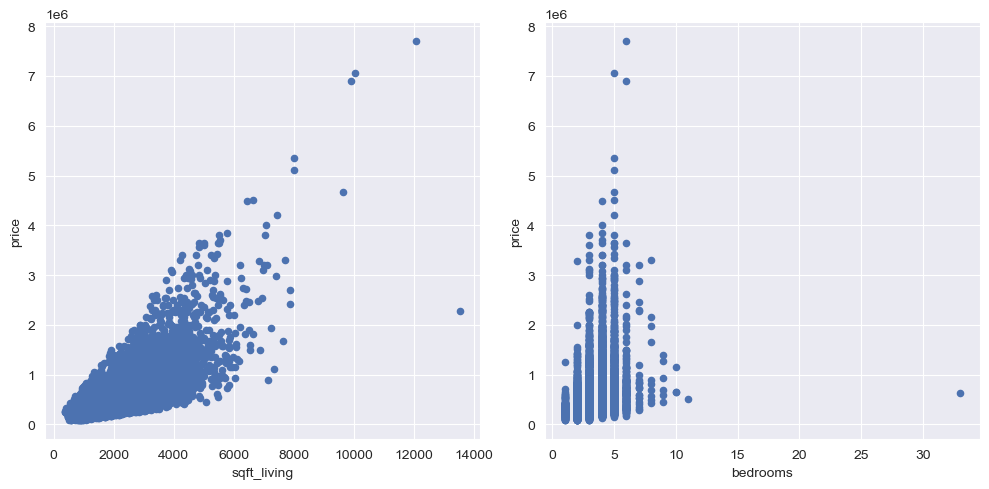

In [185]:
# Model fit
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.set_ylabel("price")
df.plot.scatter(x = "sqft_living", y = "price", ax = ax1)
df.plot.scatter(x = "bedrooms", y = "price", ax = ax2)

sns.set_style('darkgrid')
sns.set_palette('deep')
plt.tight_layout()
plt.show()

# Model iteration

In [186]:

X_iter = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'yr_renovated']]

# Add a constant term
X_iter = sm.add_constant(X_iter)

# Fit the model
model_iter = sm.OLS(y, X_iter).fit()

# Get the R-squared value
iterated_r2 = model_iter.rsquared

print("\nIterated Model")
# Print the summary of the model
print(model_iter.summary())



Iterated Model
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     3383.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:23:54   Log-Likelihood:            -2.1802e+05
No. Observations:               15762   AIC:                         4.361e+05
Df Residuals:                   15755   BIC:                         4.361e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.523e+06   1.66e+

# Interpreting iterated results

The model's r-squared and adjusted r-squared are generally statistically significant, with p-values of about 0.05.
Each time the reference category changes, the const and the other coefficients change. Const changes because it represents the value when all predictors are 0, and this means that const represents when the reference category is true.
For each increase in the model coefficients (sqft_living, bedrooms, bathrooms, floors) there is an associated increse in price of houses.

# Final model results
After evaluating the iterated model, we can select a final model based on its performance metrics and coefficient estimates. We'll focus on the R-squared value and the coefficients of specific features. We can visualize the final model results first to see:

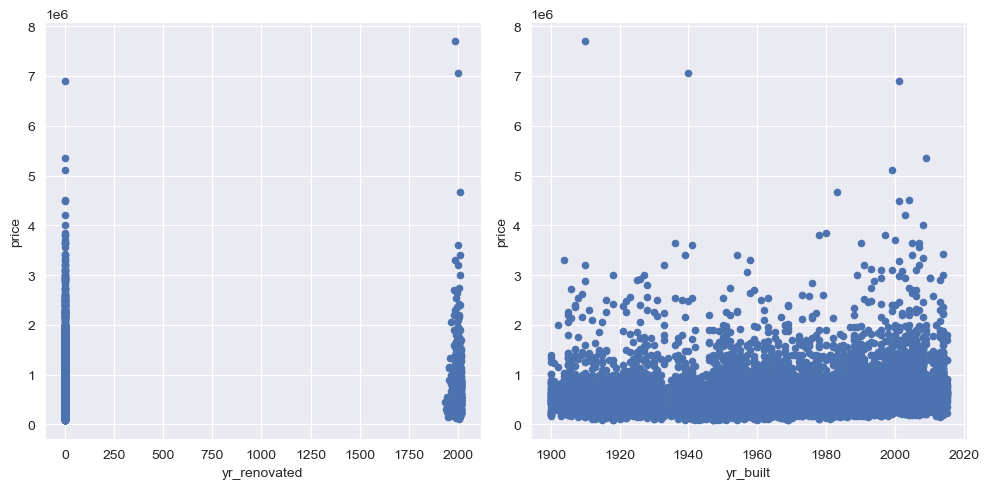

In [187]:
# Lets visualize our model
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.set_ylabel("price")
df.plot.scatter(x = "yr_renovated", y = "price", ax = ax1)
df.plot.scatter(x = "yr_built", y = "price", ax = ax2)

sns.set_style('darkgrid')
sns.set_palette('deep')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_22084\2352492771.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("yr_renovated").mean().sort_values(by="price").plot.bar(y="price", ax=ax)


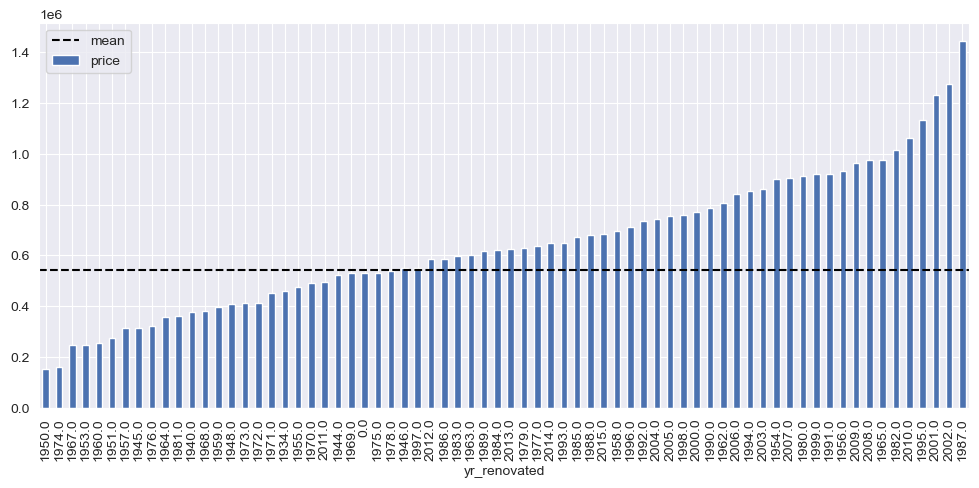

In [188]:
fig, ax = plt.subplots(figsize =(12, 5))
df.groupby("yr_renovated").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label = "mean", color="black", linestyle="--")
ax.legend();

In [189]:
# Compare R-squared values
print("Baseline R-squared:", baseline_model)
print("Iterated R-squared:", iterated_r2)

# Extract feature coefficients
coefficients = pd.DataFrame({
    'Feature': X_iter.columns[1:],
    'Coefficient': model_iter.params[1:]
})

# Print the feature coefficients
print(coefficients)

Baseline R-squared: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000239BCFCB4F0>
Iterated R-squared: 0.5629963953146762
                   Feature   Coefficient
sqft_living    sqft_living    305.618597
bedrooms          bedrooms -68511.128354
bathrooms        bathrooms  67316.308918
floors              floors  53994.543987
yr_built          yr_built  -3354.760436
yr_renovated  yr_renovated     20.878607


In [190]:
# Model parameter coefficient intervals
print(results.conf_int())

                                0             1
const                1.035362e+06  1.080897e+06
waterfront_YES       4.326621e+05  5.386012e+05
view_EXCELLENT       1.678679e+05  2.495475e+05
view_FAIR            3.405692e+04  1.003898e+05
view_GOOD            2.685952e+04  8.605436e+04
...                           ...           ...
sqft_basement_960.0  4.001458e+04  1.674182e+05
sqft_basement_970.0 -5.591046e+04  1.220564e+05
sqft_basement_980.0  9.131602e+04  2.346946e+05
sqft_basement_990.0  9.543305e+04  2.351940e+05
sqft_basement_?      9.830891e+03  5.839211e+04

[302 rows x 2 columns]


Based on the small p-values, we can say that the model is statistically significant.
The baseline r-squared explain about 51% of variance in price while the iterated model explains a little more improved r-squared of about 56% of the variance on the price.

The model feature coefficients are overally statistically significant, with t-statistic p-values well above 0.05.

However its important to note that the r-squared has limitations associated with it such as when we add more predictors, the r-squared is going to increase. This could be addressed with error-based metric but the two peform better in differnt cases.

The stakeholders would want to consider basing the value of house prices based on the year renovated since the progressive increase in house values increases as the house gets newer.

# Recommendations: 
Based on the model results and limitations, the real estate agency should consider the following actions:

1. The real estste agency should use the model as a tool to estimate house prices accurately, guide pricing strategies, and make informed business decisions.

2. The coefficient values can guide the real estste agency in understanding the relative importance of each feature on house prices. For example, a positive coefficient indicates an increase in price with an increase in the corresponding feature, while a negative coefficient indicates a decrease in price.

3. The real estate agency should be aware of the limitations and uncertainties in the analysis, considering potential model assumptions and the excluded factors that could impact house prices. They should use the models as a supportive tool alongside domain knowledge and market expertise.

By leveraging the multiple linear regression models, stakeholders can make more accurate price estimations and gain valuable insights into the factors driving house prices in the Northwestern county.